In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [80]:
# Exploratory Data Analysis

In [81]:
customers = pd.read_csv("customers1.csv")

customers.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [82]:
customers.shape

(2627, 10)

In [83]:
customers.info()
# missing values and columns containing strings (categorical variables) that need processing. Can drop ID column and Var1.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [84]:
dat_cleaned = customers.dropna()
dat_cleaned.info()
# reduced data set size by 18% (fine with this reduction?)

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 185.1+ KB


In [85]:
# display unique categories in each categorical variable
for col in ['Gender', 'Ever_Married', 'Graduated', "Profession"]:
    print(col)
    print(dat_cleaned[col].value_counts(), end='\n\n')

Gender
Gender
Male      1184
Female     970
Name: count, dtype: int64

Ever_Married
Ever_Married
Yes    1272
No      882
Name: count, dtype: int64

Graduated
Graduated
Yes    1345
No      809
Name: count, dtype: int64

Profession
Profession
Artist           696
Healthcare       337
Entertainment    254
Doctor           206
Engineer         195
Lawyer           173
Executive        147
Marketing         92
Homemaker         54
Name: count, dtype: int64



In [86]:
dat_cleaned["Profession"].value_counts()

Profession
Artist           696
Healthcare       337
Entertainment    254
Doctor           206
Engineer         195
Lawyer           173
Executive        147
Marketing         92
Homemaker         54
Name: count, dtype: int64

In [87]:
columns_to_drop = ['ID', 'Gender', 'Ever_Married', 'Graduated', "Profession","Spending_Score", "Var_1"]
dat_drop = dat_cleaned.drop(columns=columns_to_drop, inplace=False)

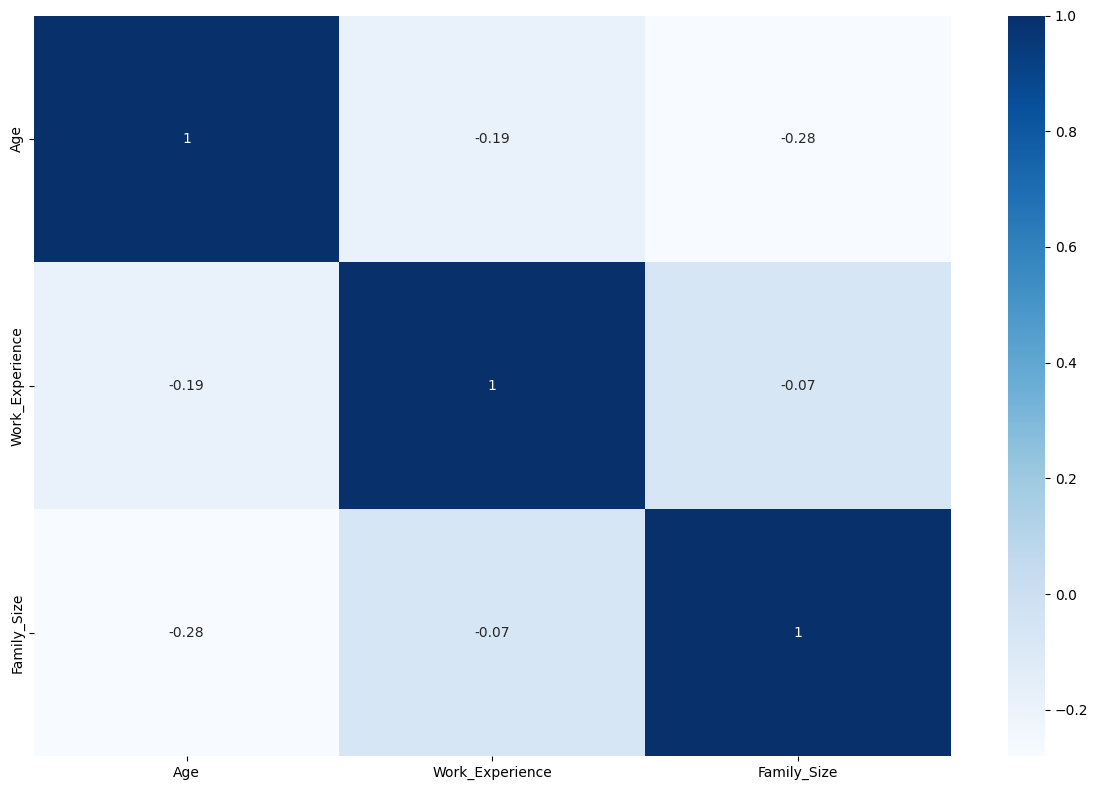

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(dat_drop.corr(), 2), cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

# weak correlations between varaibles. negative correlations when we would expect positive. Investigate futher...

C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\178925842.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dat_drop.hist(ax=ax)


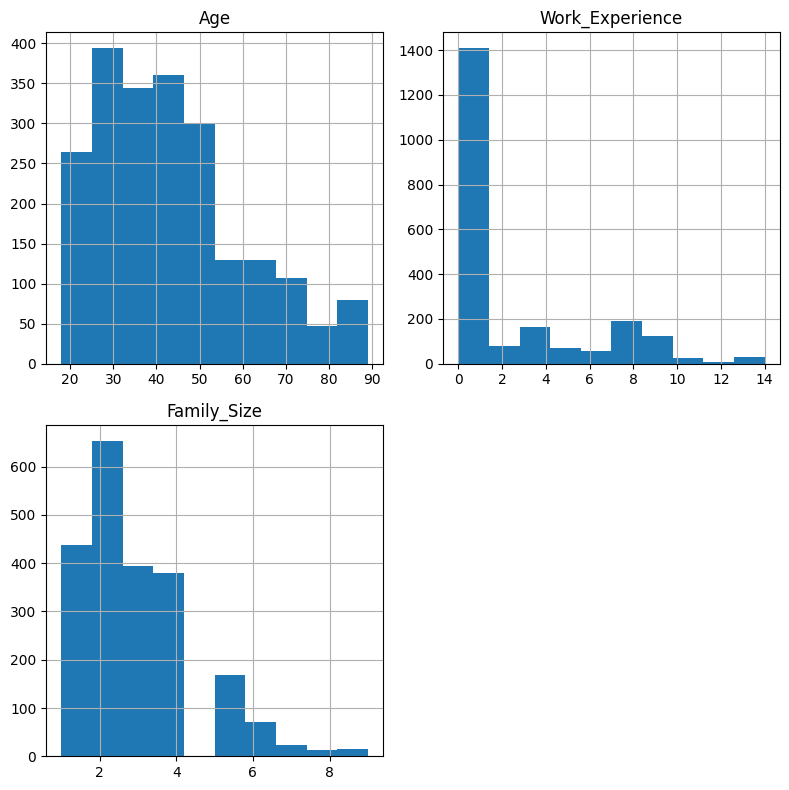

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))
dat_drop.hist(ax=ax)

plt.tight_layout()
plt.show()

# very skewed data. Gap in Family_Size? (shows thhere are values for family size of 4 in data but not in the histogram)

In [90]:
dat_drop["Family_Size"].value_counts()

Family_Size
2.0    654
1.0    437
3.0    394
4.0    379
5.0    168
6.0     70
7.0     24
9.0     16
8.0     12
Name: count, dtype: int64

In [91]:
# FEATURE ENGINEERING

In [92]:
columns_to_drop = ["ID", "Var_1"]
processed_data = dat_cleaned.drop(columns=columns_to_drop, inplace=False)

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2154 non-null   object 
 1   Ever_Married     2154 non-null   object 
 2   Age              2154 non-null   int64  
 3   Graduated        2154 non-null   object 
 4   Profession       2154 non-null   object 
 5   Work_Experience  2154 non-null   float64
 6   Spending_Score   2154 non-null   object 
 7   Family_Size      2154 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 151.5+ KB


In [93]:
# replace gender values with 0s and 1s 
customers_modif = processed_data.copy()

customers_modif['Gender'] = processed_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
customers_modif.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,Yes,36,Yes,Engineer,0.0,Low,1.0
1,1,Yes,37,Yes,Healthcare,8.0,Average,4.0
3,1,Yes,59,No,Executive,11.0,High,2.0
5,1,Yes,47,Yes,Doctor,0.0,High,5.0
6,1,Yes,61,Yes,Doctor,5.0,Low,3.0


In [94]:
customers_modif['Ever_Married'] = processed_data['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)
customers_modif.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,36,Yes,Engineer,0.0,Low,1.0
1,1,1,37,Yes,Healthcare,8.0,Average,4.0
3,1,1,59,No,Executive,11.0,High,2.0
5,1,1,47,Yes,Doctor,0.0,High,5.0
6,1,1,61,Yes,Doctor,5.0,Low,3.0


In [95]:
customers_modif['Graduated'] = processed_data['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)
customers_modif.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,36,1,Engineer,0.0,Low,1.0
1,1,1,37,1,Healthcare,8.0,Average,4.0
3,1,1,59,0,Executive,11.0,High,2.0
5,1,1,47,1,Doctor,0.0,High,5.0
6,1,1,61,1,Doctor,5.0,Low,3.0


In [96]:
# spending score has a magnitude, it's possible to rank from the lowest to highest
customers_modif.replace(to_replace={'Low': 0, 'Average': 1, 'High':2}, inplace=True)
customers_modif['Spending_Score'].head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\1781157137.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_modif.replace(to_replace={'Low': 0, 'Average': 1, 'High':2}, inplace=True)


0    0
1    1
3    2
5    2
6    0
Name: Spending_Score, dtype: int64

In [97]:
dummies = pd.get_dummies(customers_modif[['Profession']], dtype =int)

customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop(['Profession'], axis=1, inplace=True)

print(customers_modif.shape)
customers_modif.head()

(2154, 16)


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,1,36,1,0.0,0,1.0,0,0,1,0,0,0,0,0,0
1,1,1,37,1,8.0,1,4.0,0,0,0,0,0,1,0,0,0
3,1,1,59,0,11.0,2,2.0,0,0,0,0,1,0,0,0,0
5,1,1,47,1,0.0,2,5.0,0,1,0,0,0,0,0,0,0
6,1,1,61,1,5.0,0,3.0,0,1,0,0,0,0,0,0,0


In [98]:
# SCALING THE DATA

In [99]:
# standardize dataset 
X = customers_modif
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled[:3]

array([[-1.10481607,  0.83270417, -0.44524796,  0.77555592, -0.76298583,
        -0.72085348, -1.17270206, -0.69091697, -0.32519146,  3.16956682,
        -0.36562851, -0.27063564, -0.43066293, -0.16035675, -0.29551587,
        -0.21122707],
       [ 0.90512803,  0.83270417, -0.38557499,  0.77555592,  1.62925795,
         0.64718035,  0.74238531, -0.69091697, -0.32519146, -0.31550053,
        -0.36562851, -0.27063564,  2.32200159, -0.16035675, -0.29551587,
        -0.21122707],
       [ 0.90512803,  0.83270417,  0.92723055, -1.28939767,  2.52634937,
         2.01521418, -0.53433961, -0.69091697, -0.32519146, -0.31550053,
        -0.36562851,  3.6950049 , -0.43066293, -0.16035675, -0.29551587,
        -0.21122707]])

In [100]:
# CHOOSING K 

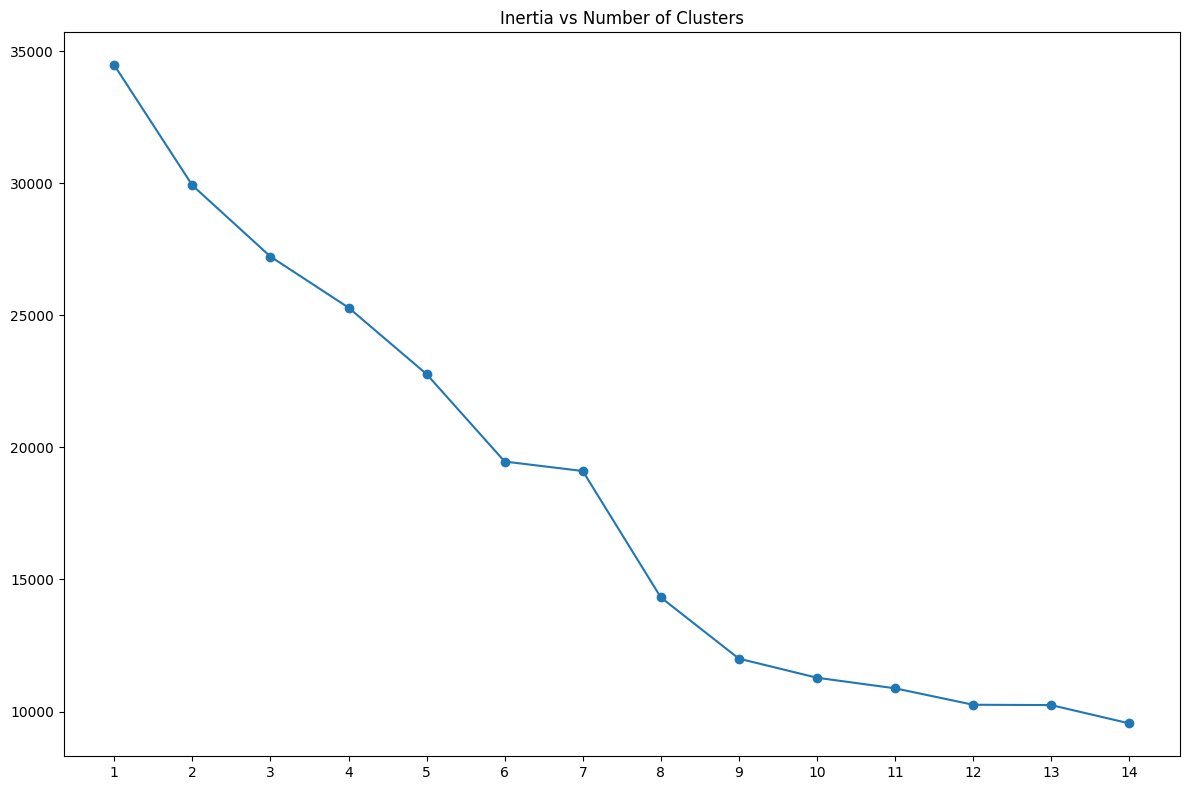

In [101]:
# run k-means alogrithm considering a range from 1 to 14 and store results. plot elbow curve to help assess best K value.
# looks like the rate of decreasing of the inertia slows down between 8 and 10. 
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 15):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(range(1, 15), inertias, marker='o')
plt.xticks(ticks=range(1, 15), labels=range(1, 15))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

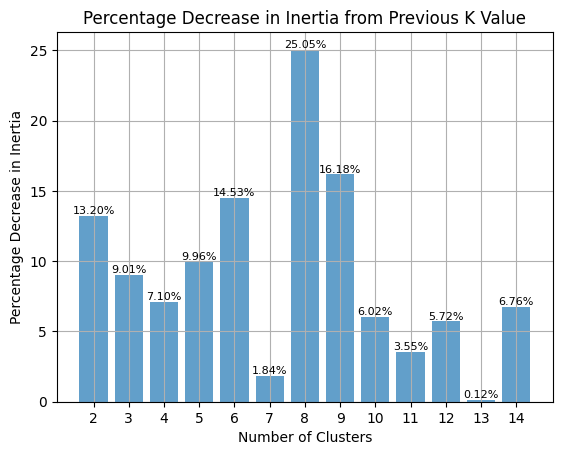

In [102]:
# Define range of cluster numbers to test
k_range = range(1, 15)  # Test clusters from 1 to 10

# Calculate percentage decrease in inertia from previous k value
percentage_decrease = [((inertias[i-1] - inertias[i]) / inertias[i-1]) * 100
                       for i in range(1, len(inertias))]

# Plotting the percentage decrease in inertia

bars = plt.bar(range(2, len(k_range) + 1), percentage_decrease, align='center', alpha=0.7)

for bar, decrease in zip(bars, percentage_decrease):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{decrease:.2f}%',
             ha='center', va='bottom', fontsize=8)


plt.xlabel('Number of Clusters')
plt.ylabel('Percentage Decrease in Inertia')
plt.title('Percentage Decrease in Inertia from Previous K Value')
plt.xticks(range(2, len(k_range) + 1))
plt.grid(True)
plt.show()

In [103]:
model = KMeans(n_clusters=4)
y = model.fit_predict(X_scaled)

y

array([1, 3, 0, ..., 3, 0, 3])

In [104]:
# create cluster column to better understand the characterists of each one 
dat_cleaned['CLUSTER'] = y + 1
dat_cleaned

C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\2791395307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_cleaned['CLUSTER'] = y + 1


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,CLUSTER
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,2
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,4
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,1
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,3
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,3
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,4
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,4
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,4
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,1


In [105]:
# cluster 3 is the largest nad 4 is the smallest 
dat_cleaned['CLUSTER'].value_counts()

CLUSTER
4    843
3    799
2    365
1    147
Name: count, dtype: int64

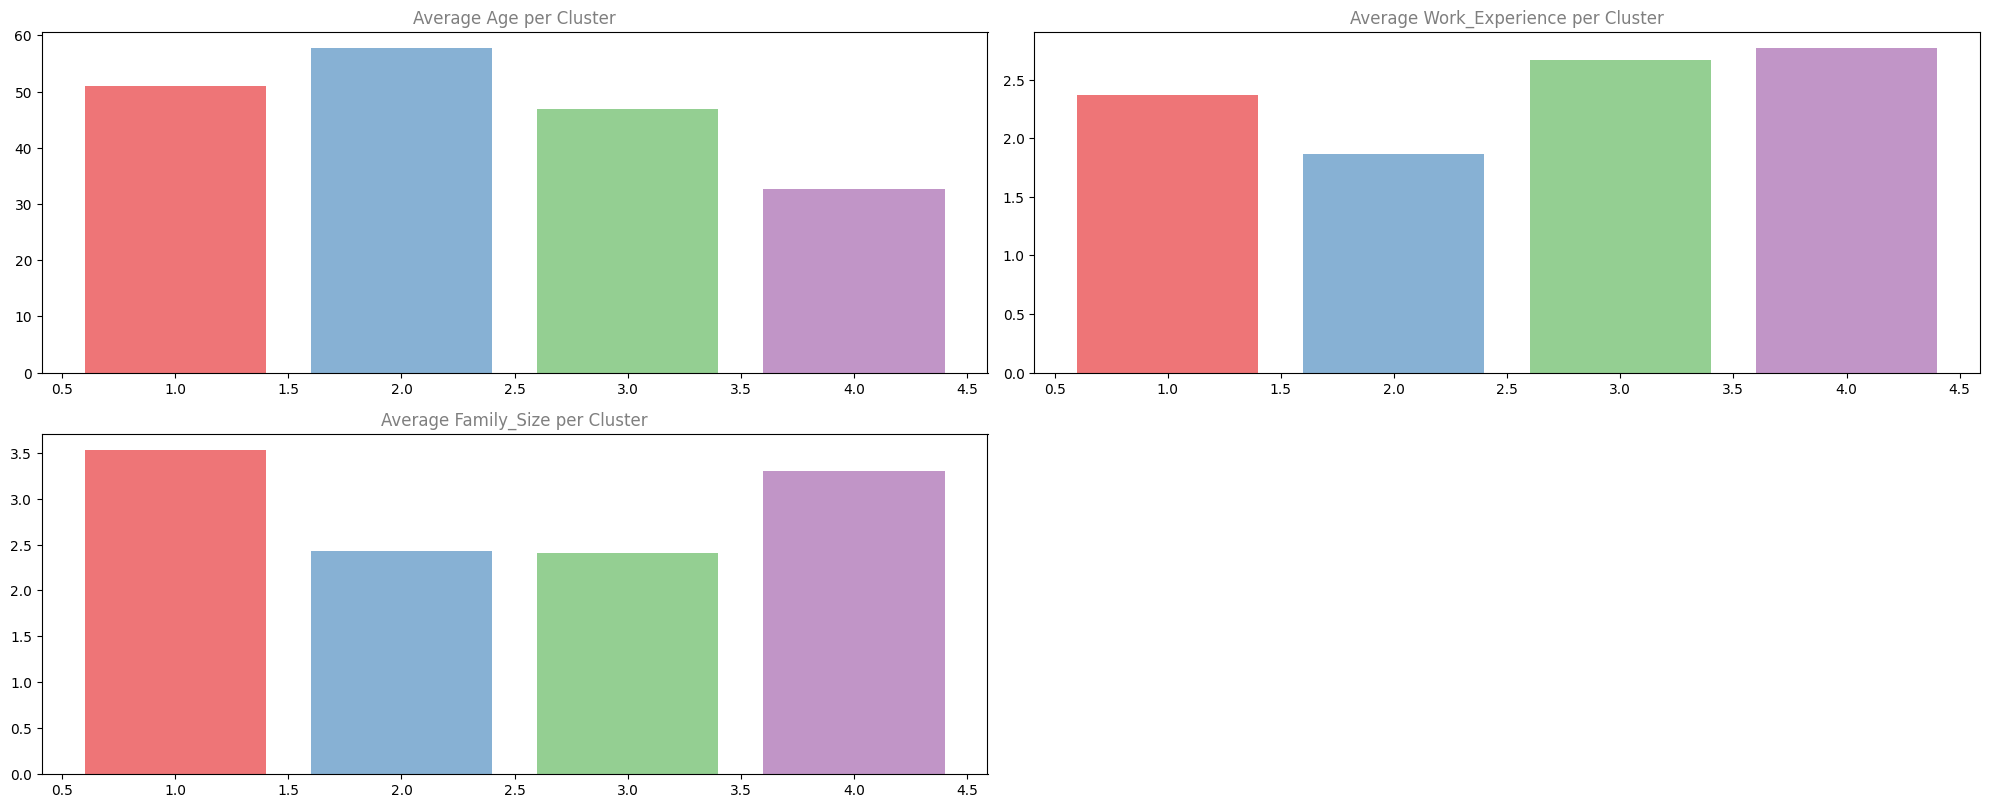

In [106]:
# check average values of each varaible per cluster
numeric_columns = dat_cleaned.select_dtypes(include=np.number).drop(['ID', "CLUSTER"], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = dat_cleaned.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

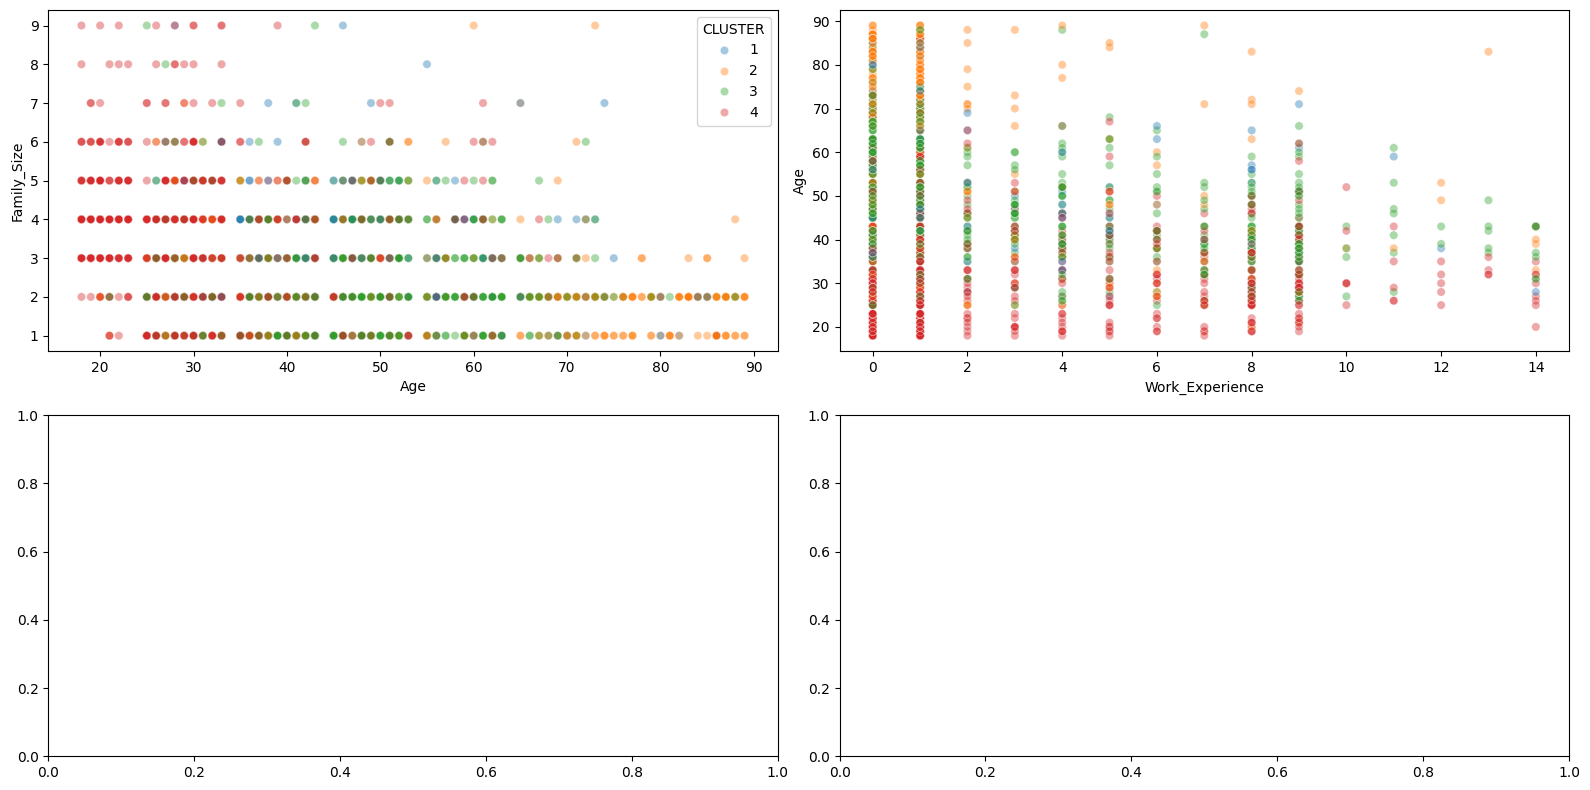

In [113]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='Age', y='Family_Size', hue='CLUSTER', data=dat_cleaned, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='Work_Experience', y='Age', hue='CLUSTER', data=dat_cleaned, palette='tab10', alpha=0.4, ax=ax2, legend=False)

plt.tight_layout()
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\1371339091.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\1371339091.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\1371339091.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\1371339091.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\Chris\AppData\Local\Temp\ipykernel_28648\1371339091.py:15: UserWarning: set_ticklabels() sh

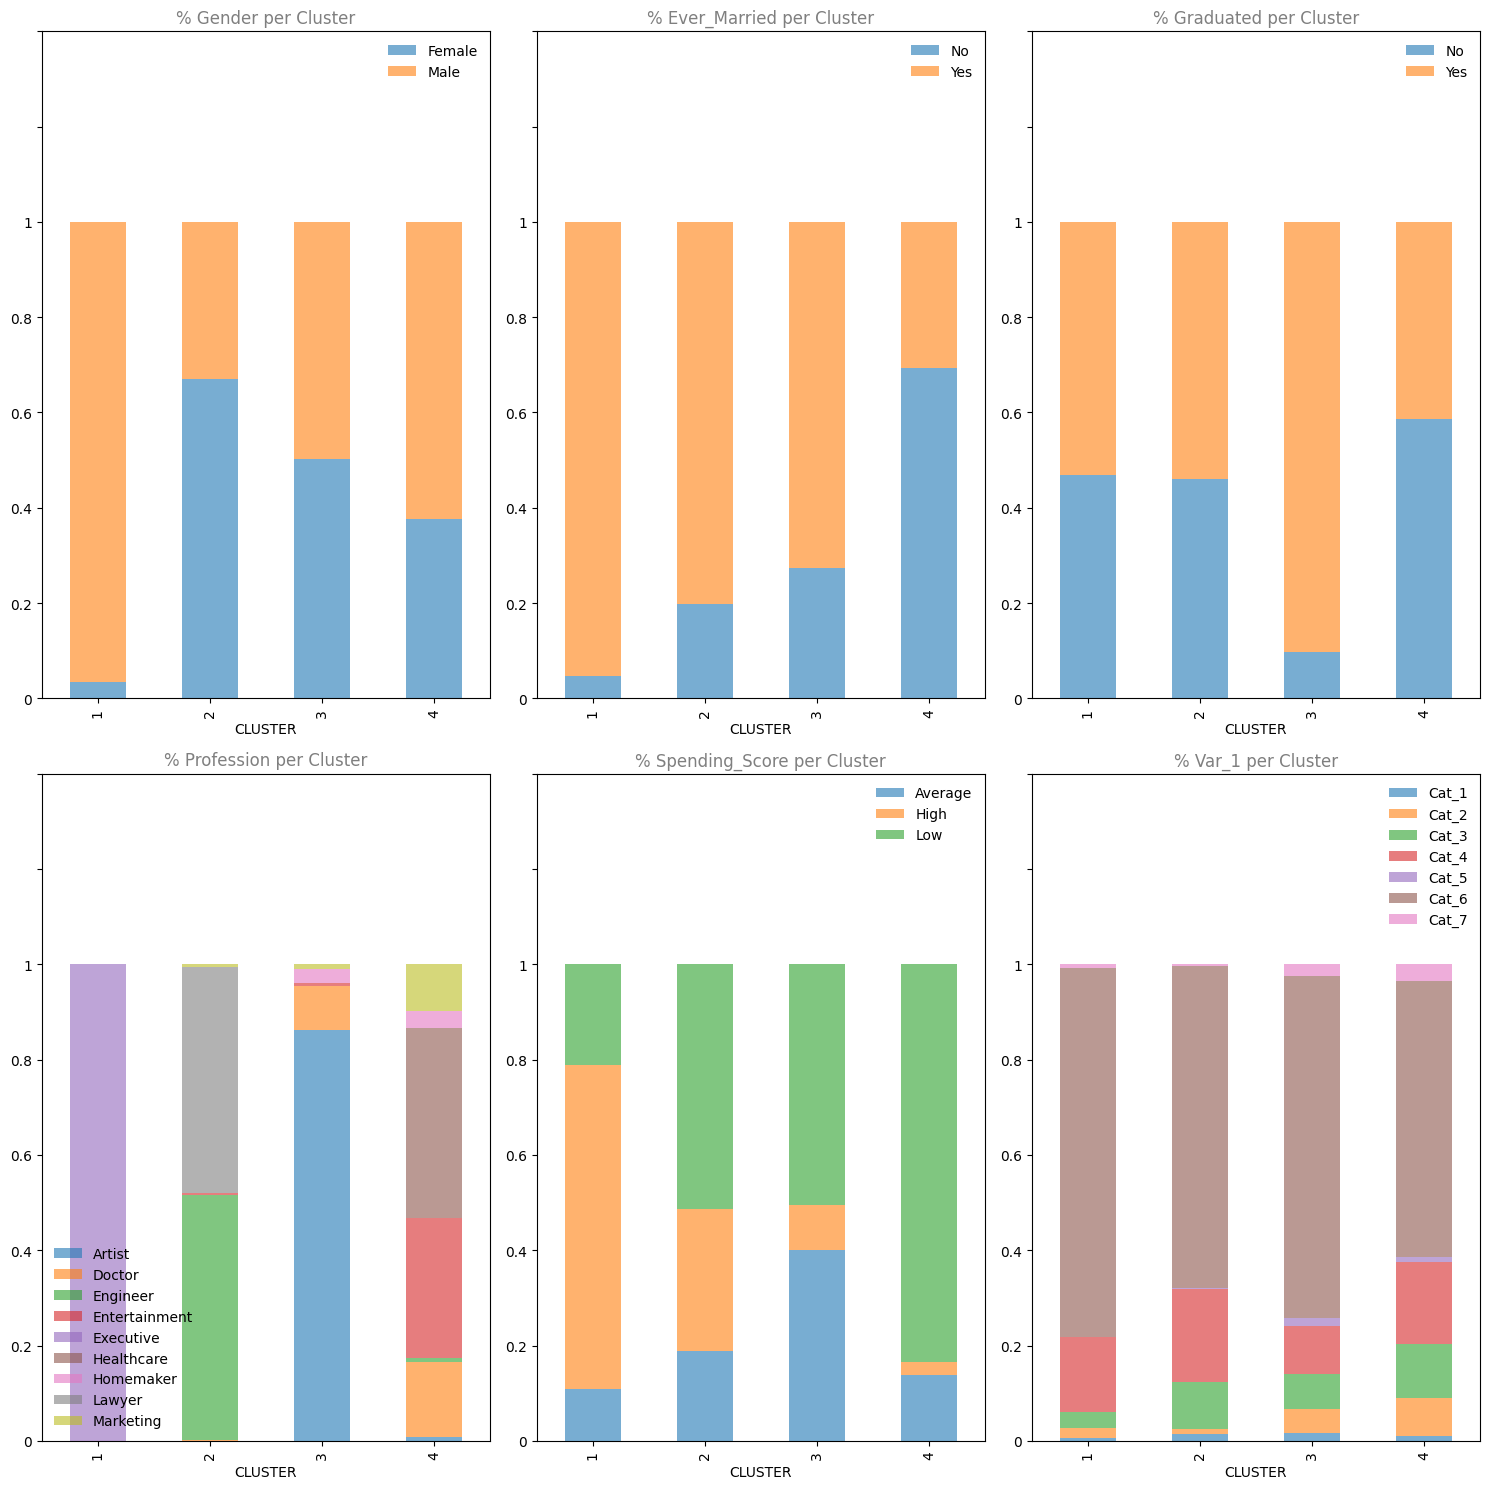

In [118]:
# plot percentual distribution of each variable of each variable in each cluster
cat_columns = dat_cleaned.select_dtypes(include=['object'])

fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=dat_cleaned['CLUSTER'], columns=dat_cleaned[col], values=dat_cleaned[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(2, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()